<img src= "https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Calcul Scientifique avec Scipy </h1>
<hr style="border-width:2px;border-color:#75DFC1">

### Contexte et objectif
>`NumPy` et `SciPy` sont deux bibliothèques Python largement utilisées dans le domaine du calcul scientifique. Dans ce notebook nous allons introduire la bibliothèque `SciPy` pour le calcul mathématique.
>
> **SciPy** (Scientific Python) a été construite sur `NumPy` et dépend fortement de ses fonctionnalités. Cependant `SciPy` étend ces fonctionnalités en proposant des modules spécialisés pour des domaines scientifiques plus avancés. Cela inclut des domaines tels que l'optimisation, l'intégration, la résolution d'équations différentielles, l'algèbre linéaire avancée, les statistiques, et bien plus encore. En résumé, `SciPy` vise à offrir une boîte à outils complète pour les scientifiques et les ingénieurs.
>
> Dans la pratique, les bibliothèques `NumPy` et `SciPy` sont souvent utilisées ensemble pour le calcule scientifique et s'appuient sur `Matplotlib` pour la visualisation. 
> 
>
> Nous allons commencer par importer les librairies nécessaire : 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
from scipy.stats import mstats
import requests
from scipy.integrate import quad

> Notre objectif sera d'étudier les revenues des joueurs de baseball de la MLB en 2023 et calculer **l'index de Gini** 
>
> L'indice de Gini est un outil statistique utilisé pour mesurer l'inégalité de répartition des revenus ou des richesses au sein d'une population donnée. Il est généralement représenté par un chiffre compris entre 0 et 1, où 0 représente une répartition parfaitement égalitaire (tout le monde a le même revenu ou la même richesse) et 1 représente une inégalité totale (une seule personne possède tout).
>
> Pour calculer l'indice de Gini, on utilise souvent **la courbe de Lorenz**, qui représente graphiquement la répartition cumulative du revenu ou de la richesse par rapport à la population cumulative. Plus la courbe de Lorenz s'éloigne de la ligne d'égalité parfaite (une ligne diagonale reliant le point de départ [0,0] au point d'arrivée [1,1]), plus l'indice de Gini est élevé, ce qui indique une plus grande inégalité.
>
> En pratique, pour calculer l'indice de Gini, on mesure **l'aire située entre la courbe de Lorenz et la ligne d'égalité parfaite, puis on la divise par l'aire totale sous la ligne d'égalité parfaite**. Cette division donne l'indice de Gini, qui est souvent exprimé en pourcentage.
>
> Nous allons récuper une table à partir du site [Spotrac](https://www.spotrac.com/) et notamment de la page dédiée au [baseball](https://www.spotrac.com/mlb/contracts/sort-value/limit-2000)

In [77]:
url = 'https://www.spotrac.com/mlb/contracts/sort-value/limit-2000/'
df = pd.read_html(url)[0]
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           576 non-null    int64 
 1   Player         576 non-null    object
 2   Signed Age     576 non-null    int64 
 3   Yrs            576 non-null    int64 
 4   Value          576 non-null    object
 5   AAV            576 non-null    object
 6   Signing Bonus  576 non-null    object
dtypes: int64(3), object(4)
memory usage: 31.6+ KB


,Rank,Player,Signed Age,Yrs,Value,AAV,Signing Bonus
0,1,Shohei Ohtani Starting Pitcher | 2024-2033 (F...,29,10,"$700,000,000","$70,000,000",$0
1,2,Mike Trout Center Field | 2019-2030 (FA: 2031),27,12,"$426,500,000","$35,541,667","$20,000,000"
2,3,Mookie Betts Shortstop | 2021-2032 (FA: 2033),27,12,"$365,000,000","$30,416,667","$65,000,000"
3,4,Aaron Judge Center Field | 2023-2031 (FA: 2032),30,9,"$360,000,000","$40,000,000",$0
4,5,Manny Machado Designated Hitter | 2023-2033 (...,30,11,"$350,000,000","$31,818,182","$45,000,000"


> Nous allons créer un fichier csv à partir de notre `DataFrame`. Cette opération n'est pas nécessaire mais elle peut être utile pour stocker de manière permanente les données. 
>
> Nous constatons que nous avons unpetit travail de pre-traitement à réaliser si nous voulons explorer d'avantage nos données. 

In [78]:
df.to_csv('salaries_2023_top570.csv')

In [96]:
df = pd.read_csv('salaries_2023_top570.csv', index_col =0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 0 to 575
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           576 non-null    int64 
 1   Player         576 non-null    object
 2   Signed Age     576 non-null    int64 
 3   Yrs            576 non-null    int64 
 4   Value          576 non-null    object
 5   AAV            576 non-null    object
 6   Signing Bonus  576 non-null    object
dtypes: int64(3), object(4)
memory usage: 36.0+ KB


,Rank,Player,Signed Age,Yrs,Value,AAV,Signing Bonus
0,1,Shohei Ohtani Starting Pitcher | 2024-2033 (F...,29,10,"$700,000,000","$70,000,000",$0
1,2,Mike Trout Center Field | 2019-2030 (FA: 2031),27,12,"$426,500,000","$35,541,667","$20,000,000"
2,3,Mookie Betts Shortstop | 2021-2032 (FA: 2033),27,12,"$365,000,000","$30,416,667","$65,000,000"
3,4,Aaron Judge Center Field | 2023-2031 (FA: 2032),30,9,"$360,000,000","$40,000,000",$0
4,5,Manny Machado Designated Hitter | 2023-2033 (...,30,11,"$350,000,000","$31,818,182","$45,000,000"


In [97]:
df['Player'][0]

'Shohei Ohtani  Starting Pitcher | 2024-2033 (FA: 2034)'

> Nous allons préparer nos données de la manière suivante :
>
>> Nous allons créer une colonne contenant le nom du joueur.
>
>> Nous allons créer une colonne contenant le rôle du joueur.
>
>> Nous allons transformer les colonnes `Value` et `AAV` en colonne numériques. 

In [98]:
df['Players'] = df['Player'].apply(lambda x : x.split('|')[0].split('  ')[0])
df['Players']

0         Shohei Ohtani
1            Mike Trout
2          Mookie Betts
3           Aaron Judge
4         Manny Machado
             ...       
571           Darin Ruf
572      Dallas Keuchel
573        Carson Kelly
574     Zach McAllister
575    Elehuris Montero
Name: Players, Length: 576, dtype: object

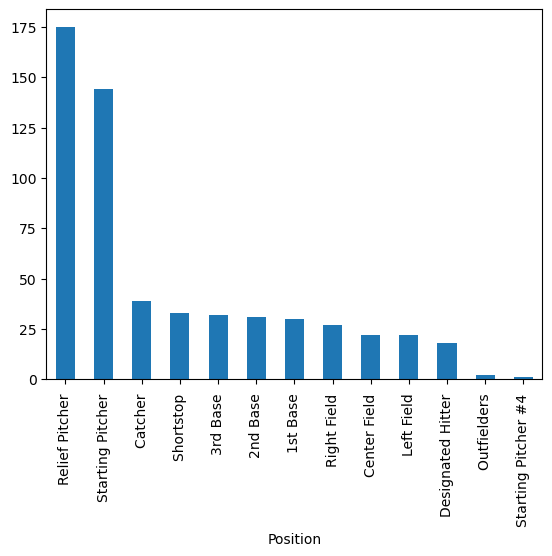

In [99]:
df['Position'] = df['Player'].apply(lambda x : x.split('|')[0].split('  ')[1])
df = df.drop('Player', axis = 1)
df.Position.value_counts().plot(kind = 'bar');

> Très bien, nous pouvons attaquer les variables décrivant le salaire annuel ainsi que les revenues totales du contrat signé par chaque joueur. 
>

In [100]:
df['Value'] = df['Value'].str.replace('$', '')
df['Value'] = df['Value'].str.replace(',', '').astype(float)
df['Value']

0      700000000.0
1      426500000.0
2      365000000.0
3      360000000.0
4      350000000.0
          ...     
571       720000.0
572       720000.0
573       720000.0
574       720000.0
575       300000.0
Name: Value, Length: 576, dtype: float64

In [101]:
df['AAV'] = df['AAV'].str.replace('$', '')
df['AAV'] = df['AAV'].str.replace(',', '').astype(float)
df['AAV']

0      70000000.0
1      35541667.0
2      30416667.0
3      40000000.0
4      31818182.0
          ...    
571      720000.0
572      720000.0
573      720000.0
574      720000.0
575      300000.0
Name: AAV, Length: 576, dtype: float64

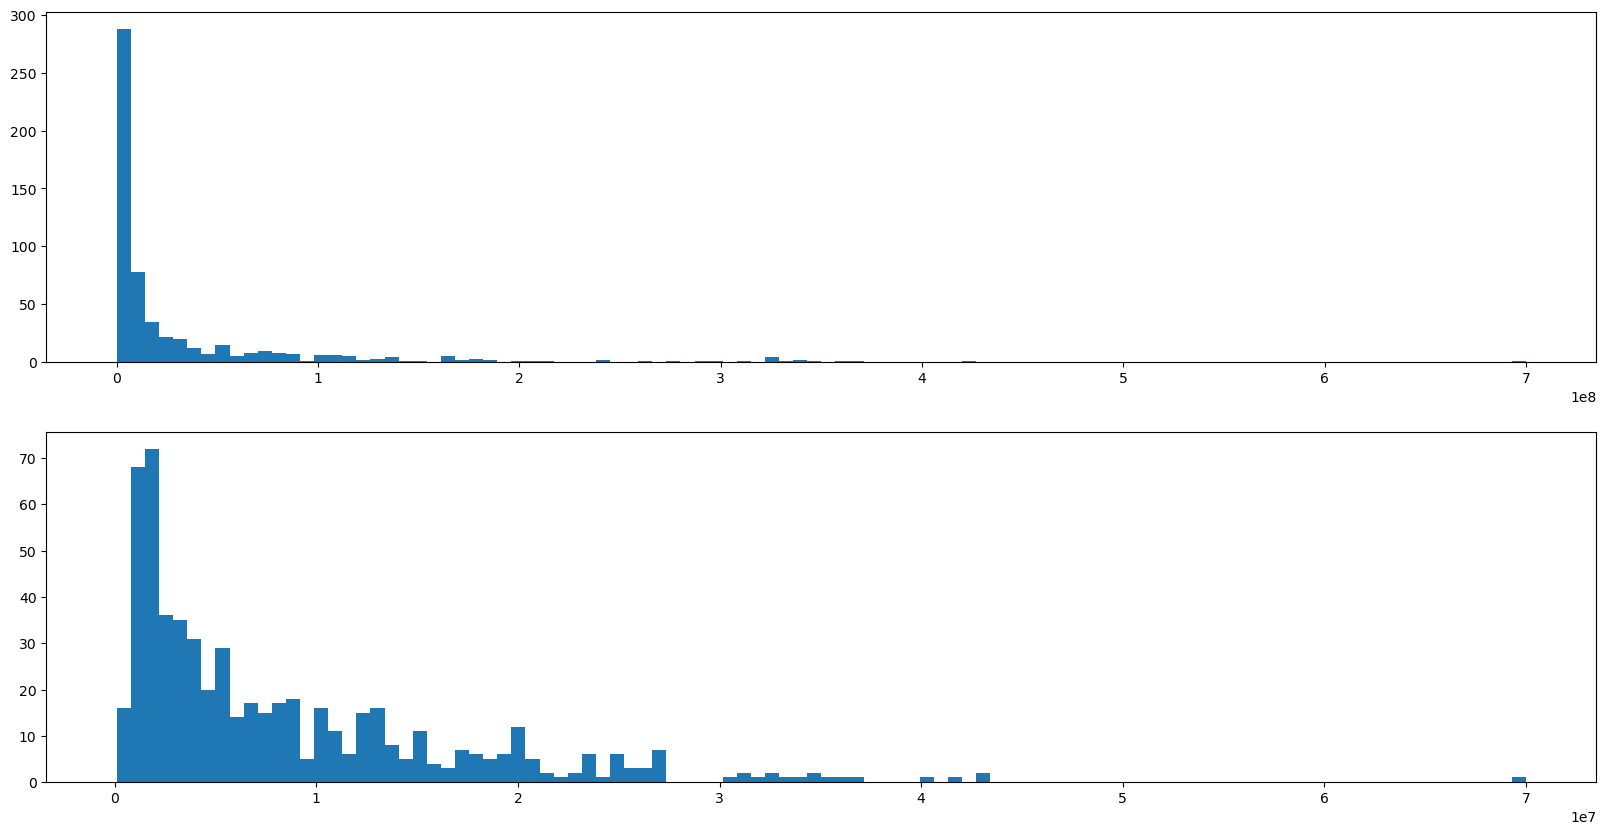

In [23]:
plt.figure(figsize = (20, 10))

plt.subplot(2,1,1)
plt.hist(df['Value'], bins = 100);

plt.subplot(2,1,2)
plt.hist(df['AAV'], bins = 100);

> Nous pouvons étudier maintenant s'il existe une différence en termes de revenues à travers les rôles.
>
> Nous pouvons visualser cette relation et par la suite effectuer un test statistique. 

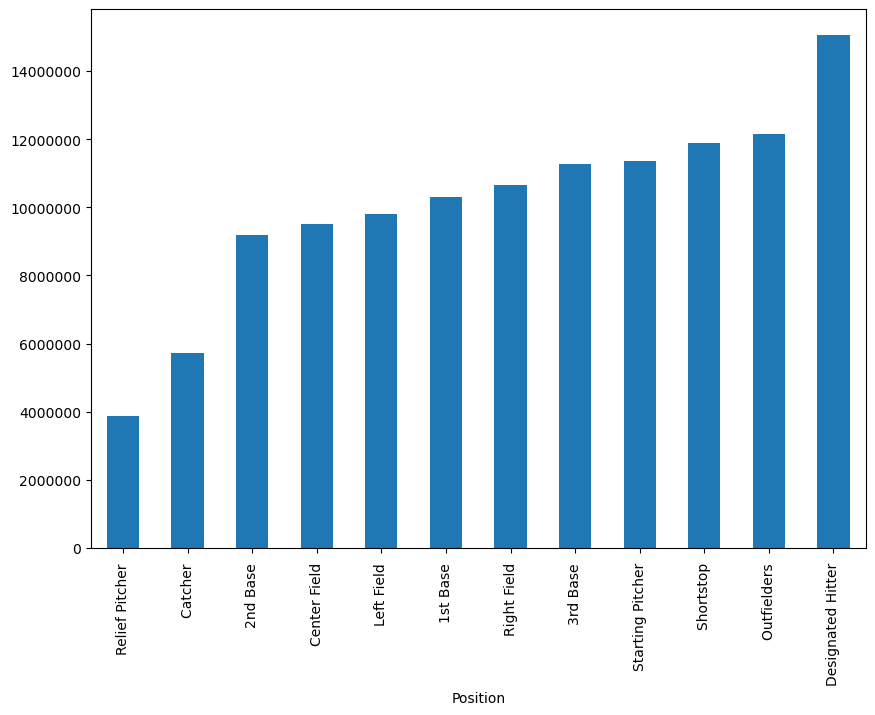

In [24]:
plt.figure(figsize = (10, 7))
ax = df.groupby('Position')['AAV'].mean().sort_values().plot(kind = 'bar')
ax.get_yaxis().get_major_formatter().set_scientific(False);

> Les `Designated Hitter ` sont les joueurs qui en moyenne sont le plus payés. Faisont un petit focus sur ces joueurs. 

In [25]:
df[df['Position'] == 'Designated Hitter ']

,Rank,Signed Age,Yrs,Value,AAV,Signing Bonus,Players,Position
60,58,30,5,100000000.0,20000000.0,$0,Nick Castellanos,Designated Hitter
93,94,30,4,65000000.0,16250000.0,$0,Marcell Ozuna,Designated Hitter
124,124,31,3,42000000.0,14000000.0,"$9,000,000",Jorge Soler,Designated Hitter
249,247,35,1,10000000.0,10000000.0,$0,J.D. Martinez,Designated Hitter


> Passons à l'analyse statistique. 
>
> Nous pouvons par exemple étudier dans quelle mesure le salaire varie en fonction de la "Position". 
>
> Pour ce faire nous allons regrouper les salaires par position et les stocker dans un liste contenant des Séries de pandas.

In [48]:
groupes = []

for groupe, salaire in df.groupby('Position')['AAV'] :
    groupes.append(salaire)

for i, groupe in enumerate(groupes[:2]):
    print(f"Groupe {i+1} (Position: {df['Position'].unique()[i]}):")
    print(groupe)
    print("\n")

Groupe 1 (Position: Starting Pitcher ):
7      25384615.0
29     21000000.0
31     27000000.0
41     26000000.0
73     11428571.0
99     19500000.0
126    20000000.0
140    17000000.0
142    16500000.0
169     8000000.0
170    12000000.0
178    20500000.0
183    19900000.0
193     5500000.0
240    10900000.0
254     9300000.0
284     7500000.0
295     6775000.0
298     6500000.0
316     5250000.0
327     5000000.0
334     4650000.0
346     4137500.0
354     4000000.0
367     3500000.0
374     3250000.0
376     3200000.0
495     1500000.0
497     1350000.0
499     1350000.0
504     1250000.0
571      720000.0
Name: AAV, dtype: float64


Groupe 2 (Position: Center Field ):
15     25454545.0
27     25000000.0
30     23357143.0
44     25000000.0
55     15214286.0
63     15000000.0
79     15200000.0
114    12500000.0
136     5000000.0
137    11666667.0
154     4773750.0
162     5150000.0
166     4000000.0
192     8500000.0
211    14200000.0
241    10600000.0
260     2958333.0
261     440000

> Le test de **Shapiro-Wilk** est un test statistique utilisé pour évaluer si un échantillon de données suit une distribution normale ou non. Il est largement utilisé en statistique pour vérifier l'assumption de normalité avant d'appliquer certains tests paramétriques.
>
> **H0 : Les données suivent une distribution normale.**

In [85]:
for i, groupe in enumerate(groupes) :
    stat, p_value = stats.shapiro(groupe)
    print(f"Test de Shapiro-Wilk pour le groupe '{df['Position'].unique()[i]}': p-value = {p_value}")

Test de Shapiro-Wilk pour le groupe 'Starting Pitcher ': p-value = 0.00233553908765316
Test de Shapiro-Wilk pour le groupe 'Center Field ': p-value = 0.0003565112710930407
Test de Shapiro-Wilk pour le groupe 'Shortstop ': p-value = 0.0006252459716051817
Test de Shapiro-Wilk pour le groupe 'Designated Hitter ': p-value = 6.4261826082656626e-06
Test de Shapiro-Wilk pour le groupe 'Right Field ': p-value = 5.66720227652695e-05
Test de Shapiro-Wilk pour le groupe '1st Base ': p-value = 0.998475193977356
Test de Shapiro-Wilk pour le groupe '3rd Base ': p-value = 0.0064527359791100025
Test de Shapiro-Wilk pour le groupe '2nd Base ': p-value = 0.9854952692985535
Test de Shapiro-Wilk pour le groupe 'Left Field ': p-value = 1.7598668019831037e-14
Test de Shapiro-Wilk pour le groupe 'Catcher ': p-value = 0.004507182631641626
Test de Shapiro-Wilk pour le groupe 'Relief Pitcher ': p-value = 0.00012429706112015992
Test de Shapiro-Wilk pour le groupe 'Starting Pitcher #4 ': p-value = 2.6520237828703

> Utilisons maintenant le test de Levene pour évaluer l'homoscédasticité des groupes, c'est-à-dire pour déterminer si les variances des échantillons sont égales. 
>
> H0 : Les variances des échantillons sont égales. 

In [86]:
stat_homoscedasticity, p_value_homoscedasticity = stats.levene(*groupes)
print("Test de Levene pour l'homoscédasticité:", p_value_homoscedasticity)

Test de Levene pour l'homoscédasticité: 1.7714689631336793e-11


> Faisons un test Anova

In [105]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('AAV ~ Position', data=df).fit()


anova_table = sm.stats.anova_lm(model)

print(anova_table)


model.summary()

             df        sum_sq       mean_sq         F        PR(>F)
Position   12.0  6.937265e+15  5.781054e+14  8.744052  2.094279e-15
Residual  563.0  3.722226e+16  6.611414e+13       NaN           NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AAV   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     8.744
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           2.09e-15
Time:                        15:21:51   Log-Likelihood:                -9975.6
No. Observations:                 576   AIC:                         1.998e+04
Df Residuals:                     563   BIC:                         2.003e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.188e+07   1.48e+06      8.005      0.000    8.97e+06    1.48e+07
Position[T.2nd Base ]             -3.56e+06   2.08e+06     -1.710      0.088   -7.65e+06     5.3e+05
Position[T.3rd Base ]            -1.866e+06   2.07e+06     -0.903      0.367   -5.92e+06    2.19e+06
Position[T.Catcher ]             -6.217e+06   1.97e+06     -3.149      0.002   -1.01e+07   -2.34e+06
Position[T.Center Field ]        -2.631e+06   2.28e+06     -1.153      0.250   -7.11e+06    1.85e+06
Position[T.Designated Hitter ]    2.576e+05   2.42e+06      0.106      0.915    -4.5e+06    5.02e+06
Position[T.Left Field ]          -1.823e+06   2.28e+06     -0.799      0.425   -6.31e+06    2.66e+06
Position[T.Outfielders ]         -9.384e+06   5.94e+06     -1.580      0.115    -2.1e+07    2.28e+06
Position[T.Relief Pitcher ]      -8.048e+06   1.61e+06     -5.009      0.000   -1.12e+07   -4.89e+06
Position[T.Right Field ]          -1.47e+06   2.16e+06     -0.682      0.496   -5.71e+06    2.77e+06
Position[T.Shortstop ]           -6.935e+05   2.05e+06     -0.338      0.735   -4.72e+06    3.34e+06
Position[T.Starting Pitcher ]     2.406e+04   1.63e+06      0.015      0.988   -3.18e+06    3.23e+06
Position[T.Starting Pitcher #4 ] -7.384e+06   8.27e+06     -0.893      0.372   -2.36e+07    8.85e+06
==============================================================================
Omnibus:                      228.694   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.350
Skew:                           1.725   Prob(JB):                    6.38e-243
Kurtosis:                       8.879   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
print(df[df['Position'] == '1st Base ']['AAV'].mean())
print(df[df['Position'] == '2nd Base ']['AAV'].mean())
print(round(model.params[0] + model.params[1], 2))


11884161.766666668
8323700.774193549
8323700.77


> Prenons un instant pour étudier la relation le salaire et l'âge auquel le joueur à signé le contrat. 
>

Coefficient de corrélation de Pearson : 0.016737209322173506
Valeur p : 0.6880175568339278


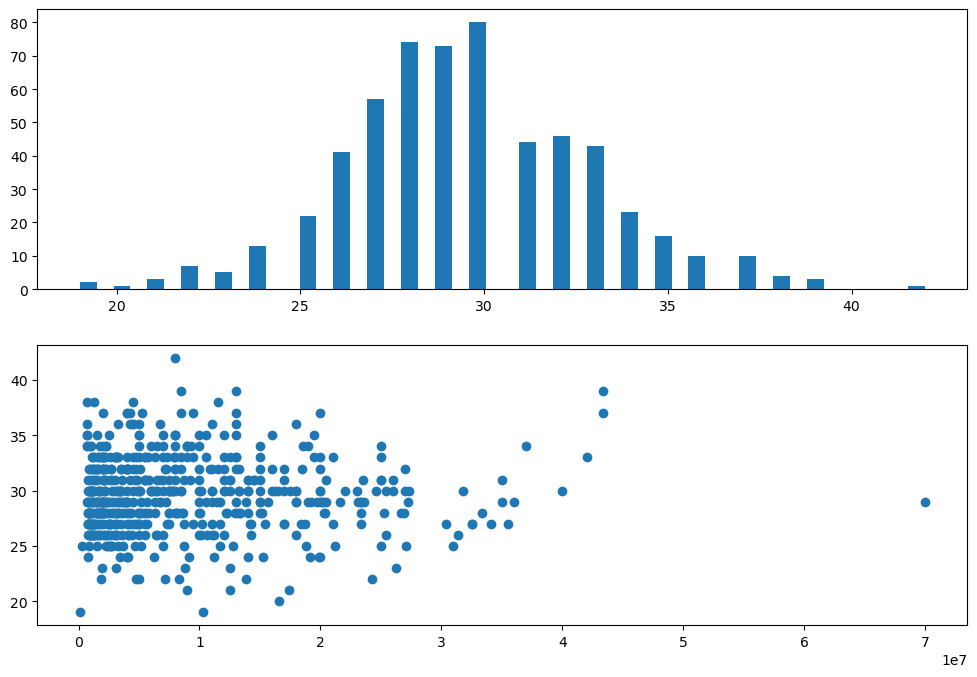

In [69]:
plt.figure(figsize = (12, 8))
plt.subplot(2, 1, 1)
plt.hist(df['Signed Age'], bins = 50)
plt.subplot(2, 1, 2)
plt.scatter(df['AAV'], df['Signed Age'])


correlation_coefficient, p_value = stats.pearsonr(df['AAV'], df['Signed Age'])


print("Coefficient de corrélation de Pearson :", correlation_coefficient)
print("Valeur p :", p_value)

> Ok, nous pouvons attaquer maintenant notre travail sur l'index de Gini. 
>
> Commençons par diviser notre population en déciles en fonction de la variable `AAV`
>
> Interpretons nos résultats. 

In [88]:
quantiles = mstats.mquantiles(df['AAV'], np.array([0, 0.2, 0.4, 0.6, 0.8, 1]))


print("Les 5 quantiles des salaires sont :")
for i, quantile in enumerate(quantiles):
    print(f"Quantile {i}: {quantile}")

Les 5 quantiles des salaires sont :
Quantile 0: 300000.0
Quantile 1: 1750000.0
Quantile 2: 3500000.0
Quantile 3: 7500000.0
Quantile 4: 14000000.0
Quantile 5: 70000000.0


> Pour calculer le coefficient de Gini nous aurons besoin de définir **la courbe de Lorenz** en utilisant nos données. La courbe de **Lorenz** est un outil graphique utilisé en économie pour représenter graphiquement **la distribution cumulative de la richesse (ou d'autres variables économiques) au sein d'une population donnée**.
>
> La construction de la courbe de Lorenz implique deux axes : **l'axe horizontal représente la proportion cumulée des individus classés par ordre croissant de richesse**, tandis que **l'axe vertical représente la proportion cumulée de la richesse totale** ou du revenu total correspondant à chaque tranche de population. 
>
>Nous voulons donc maintenant calculer le pourcentage de salaire cumulé décile par décile. Autrement dit pour chaque décile je veux connaître le pourçentage de revenues cumulés par rapport aux revenues totales. 
>
> Par la suite nous pouvons comparer la courbe décrivant la distribution des pourcentages de revenues cumulées par quintiles (**la courbe de Lorenz**) par rapport à la droite décrivant l'égalité parfaite.


In [89]:
pourcentages = []
salaires_totaux = df['AAV'].sum()

for quantile in quantiles :
    somme_salaire_quartile = df.AAV[df.AAV <= quantile].sum()
    pourcentage_par_quartile = (somme_salaire_quartile / salaires_totaux).round(2)
    pourcentages.append(pourcentage_par_quartile)
    

list(pourcentages)
    

[0.0, 0.03, 0.09, 0.22, 0.46, 1.0]

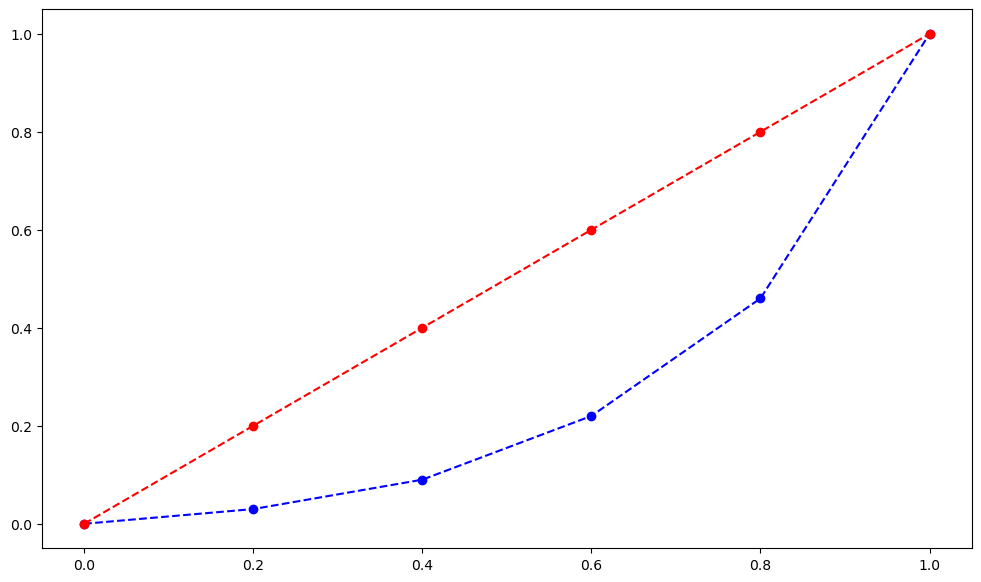

In [90]:
x = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.figure(figsize = (12, 7))
plt.plot(x, pourcentages, '--o', color = 'blue')
plt.plot(x, x, '--o', color = 'red');

> **Le coefficient de Gini est le ratio entre l'aire comprise entre la courbe de Lorenz et la droite d'égalité, et l'aire totale sous la droite d'égalité**.
>
> Pour calculer ces aires, nous avons besoin de trouver une fonction qui va approximer le modèle des salaire. Nous avons déjà une fonction pour la courbe de l'égalité telle que x = y. 
>
> Pour trouver une fonction qui approxime le modèle des salaires nous pouvons ajuster un polynôme de degré 4 aux données représentant la distribution des revenus ou des richesses cumulées. Pour ce faire nous pouvons utiliser la fonction `polyfit` de `Numpy`.
>
> La fonction `polyfit` prend en arguement un tableau de valeurs représentant la proportion cumulative de la population, et un tableau représentant les pourcentages cumulés des revenus ou des richesses correspondants. Ce polynôme peut ensuite être utilisé pour représenter **la courbe de Lorenz**.
>
> La fonction `polyfit` nous permet d'ajouster le polynôme suivant : $P(x) = a_n x^n + a_{n-1} x^{n-1} + \ldots + a_1 x + a_0$
>

> Vous avez une courbe qui représente le pourcentage de revenus par quantile, ce qui signifie qu'elle illustre la répartition des revenus dans différents groupes de la population.
>
> En ajustant un polynôme de degré 4 à cette courbe, vous obtenez une fonction mathématique qui modélise la distribution des revenus selon une forme spécifique. L'ajustement d'un polynôme de degré 4 vous permet de capturer une certaine complexité dans la distribution des revenus, qui pourrait ne pas être bien représentée par une simple fonction linéaire ou quadratique.

In [91]:
coefs = np.polyfit(x, pourcentages, 4)
coefs

array([ 1.95312500e+00, -2.20486111e+00,  1.30729167e+00, -5.67460317e-02,
        5.95238095e-04])

> Une fois que nous avez estimé les coefficients de notre polynôme à l'aide d'une méthode d'ajustement, comme `polyfit`, nous pouvons utiliser la fonction `np.polyval()` pour évaluer ce polynôme à différents points de notre choix (pour nous chaque quantile). Cela nous permet d'obtenir les valeurs de la fonction polynomiale pour ces points spécifiques.


[5.95238095e-04 2.70238095e-02 9.59523810e-02 2.14047619e-01
 4.62976190e-01 9.99404762e-01]


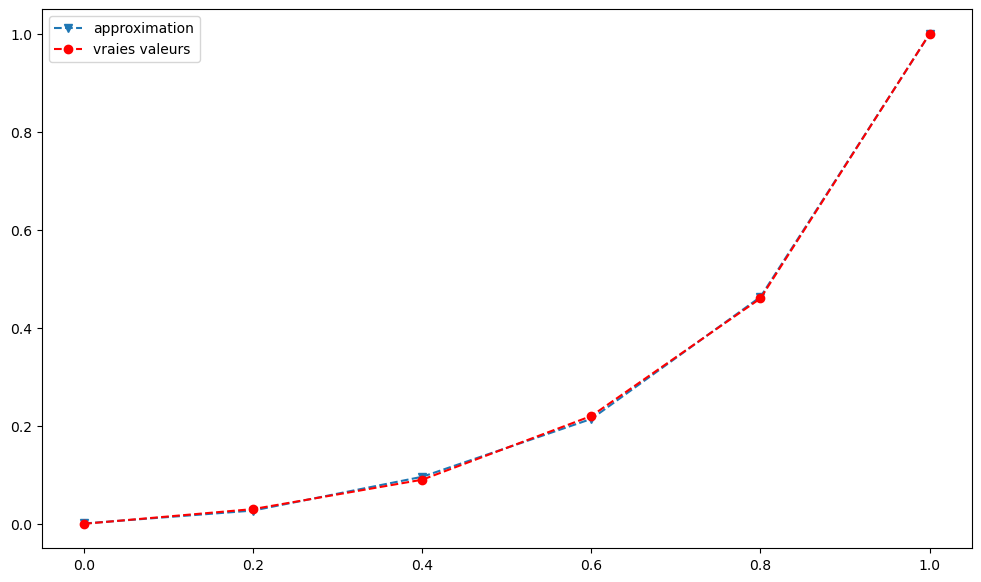

In [92]:
print(np.polyval(coefs, x))

plt.figure(figsize = (12, 7))
plt.plot(x, np.polyval(coefs, x), '--v', label = 'approximation')
plt.plot(x, pourcentages, '--o', color = 'red', label = 'vraies valeurs')
plt.legend();

In [41]:
coefs

array([ 1.56250000e+00, -1.50462963e+00,  9.44444444e-01, -3.10846561e-03,
        3.96825397e-04])

> Définissons une fonction qui nous retourne pour chaque valeur représentant un pourcentage de la population, le pourcentage de richesse détenue par celle-ci.
>
> Définissons par la suite la fonction Egalité. 

Text(0.8, 0.1, 'A2')

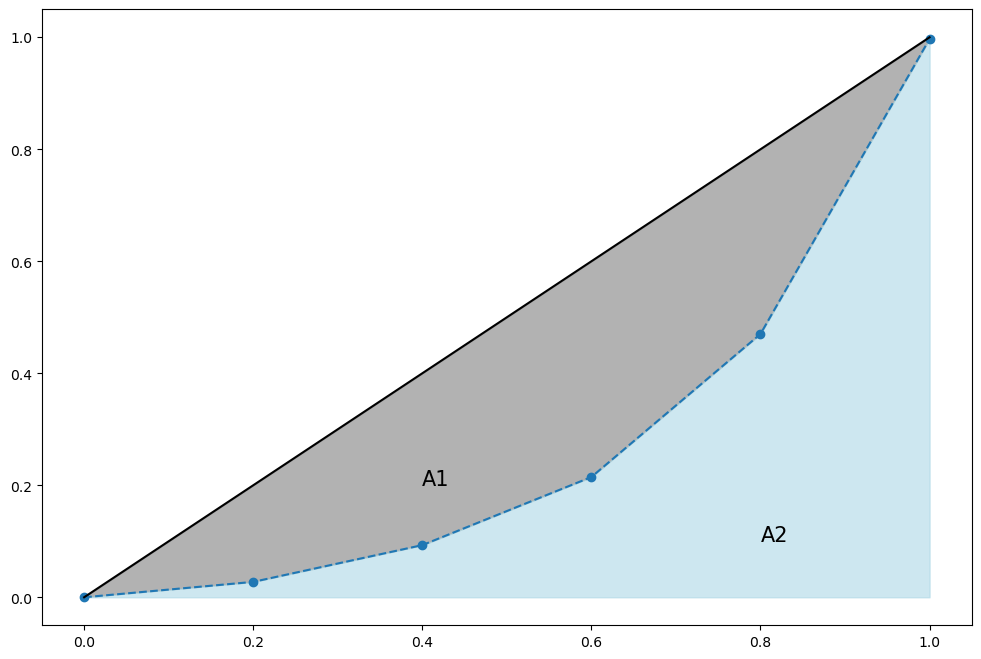

In [94]:
def L(x) :
    return 1.56*x**4 -1.50*x**3 + 0.94*x**2 -0.003*x

def E(x) :
    return x

plt.figure(figsize = (12,8))
plt.plot(x, L(x), '--o', label = 'Lorenz')
plt.plot(x, E(x), color = 'black', label = 'Equality');
plt.fill_between(x, L(x), E(x), color = 'gray', alpha = 0.6)
plt.fill_between(x, L(x), color = 'lightblue', alpha = 0.6);
plt.text(0.4, 0.2, 'A1', size = 15)
plt.text(0.8, 0.1, 'A2', size = 15)

> Nous pouvons définir le coefficient de Gini ainsi : $G = 1 - 2 \times \int_{0}^{1} (L(x) - x) \, dx$

> Nous allons créer une fonction a1(x) qui calcule la différence entre la valeur de la droite d'égalité et la valeur de la courbe de Lorenz pour une valeur donnée de x. Autrement dit, elle mesure la distance verticale entre la courbe de Lorenz et la droite d'égalité à chaque point x.
>
> Par la suite nous devons intégrer la Différence Entre les Courbes :
>
> En utilisant la fonction quad(a1, 0, 1), on intègre la fonction a1(x) sur l'intervalle [0, 1]. Cela revient à calculer l'aire entre les deux courbes pour la tranche de population allant de 0 % à 100 %.
Cette intégration numérique nous donne l'aire entre les deux courbes sur cet intervalle.
>
>Par la suite nous devons multiplier l'Aire par 2 et Calculer le Coefficient de Gini :
>
> En multipliant l'aire entre les courbes par 2, on obtient l'aire totale entre les deux courbes sur l'intervalle [0, 1], car l'intégrale calcule l'aire sous la courbe et on veut l'aire au-dessus et en dessous de la courbe.
En soustrayant ce résultat de 1, on obtient le coefficient de Gini. Plus précisément, on soustrait le double de l'aire entre les courbes de 1, qui est l'aire totale sous la droite d'égalité (qui représente une distribution parfaite et équitable), pour obtenir un indice de Gini compris entre 0 (parfaite égalité) et 1 (inégalité totale).

In [95]:

def a1(x) :
    return E(x) - L(x)

print(1 - (2*quad(a1, 0, 1)[0]))  

0.4976666666666667


> Dans le calcul du coefficient de Gini, la multiplication par 2 vient du fait que nous sommes intéressés par la mesure de l'aire entre la courbe de Lorenz (qui représente la distribution cumulative réelle des richesses ou des revenus) et la ligne d'égalité parfaite (qui représente une distribution parfaitement égalitaire).
>
>Considérons les deux situations possibles :
>
>Lorsque la courbe de Lorenz est au-dessus de la ligne d'égalité, cela signifie qu'il y a un excès de richesse par rapport à une distribution parfaitement égalitaire.
>
>Lorsque la courbe de Lorenz est en dessous de la ligne d'égalité, cela signifie qu'il y a un déficit de richesse par rapport à une distribution parfaitement égalitaire.
>
> En multipliant par 2 dans la formule du coefficient de Gini, nous prenons en compte simultanément ces deux aspects :
>
>La partie positive de la différence entre la courbe de Lorenz et la ligne d'égalité (l'excès de richesse au-dessus de l'égalité).
>
> La partie négative de la différence entre la courbe de Lorenz et la ligne d'égalité (le déficit de richesse en dessous de l'égalité)

In [1]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.
